In [14]:
import pandas as pd
import numpy as np
df=pd.read_csv("E:\\桌面\\train.csv")
test=pd.read_csv("E:\\桌面\\test1.csv")
del df['Unnamed: 0']
del test['Unnamed: 0']
df.head(10)

,android_id,apptype,carrier,dev_height,dev_ppi,dev_width,label,lan,media_id,ntt,os,osv,package,sid,timestamp,version,fea_hash,location,fea1_hash,cus_type
0,316361,1199,46000.0,0.0,0.0,0.0,1,NaN,104,6.0,android,9,18,1438873,1.559893e+12,8,2135019403,0,2329670524,601
1,135939,893,0.0,0.0,0.0,0.0,1,NaN,19,6.0,android,8.1,0,1185582,1.559994e+12,4,2782306428,1,2864801071,1000
2,399254,821,0.0,760.0,0.0,360.0,1,NaN,559,0.0,android,8.1.0,0,1555716,1.559837e+12,0,1392806005,2,628911675,696
3,68983,1004,46000.0,2214.0,0.0,1080.0,0,NaN,129,2.0,android,8.1.0,0,1093419,1.560042e+12,0,3562553457,3,1283809327,753
4,288999,1076,46000.0,2280.0,0.0,1080.0,1,zh-CN,64,2.0,android,8.0.0,0,1400089,1.559867e+12,5,2364522023,4,1510695983,582
5,184658,788,46000.0,2196.0,480.0,1080.0,1,zh-CN,194,6.0,Android,8.1.0,35,1253737,1.559976e+12,5,1655793887,5,1080320295,430
6,0,1106,46000.0,0.0,0.0,0.0,0,NaN,39,0.0,android,9,123,1387136,1.559845e+12,0,369486452,6,4190764663,411
7,0,1001,46000.0,760.0,0.0,360.0,1,zh-CN,29,2.0,Android,8.1.0,4,1597216,1.559783e+12,0,3912031003,7,2627690535,411
8,646994,893,0.0,0.0,0.0,0.0,0,NaN,19,6.0,android,8.1,0,1910989,1.559549e+12,4,3307888762,8,2961728815,886
9,0,1001,46000.0,760.0,0.0,360.0,1,zh-CN,29,2.0,Android,8.1.0,4,1785622,1.559646e+12,0,1485855711,9,2678022183,411


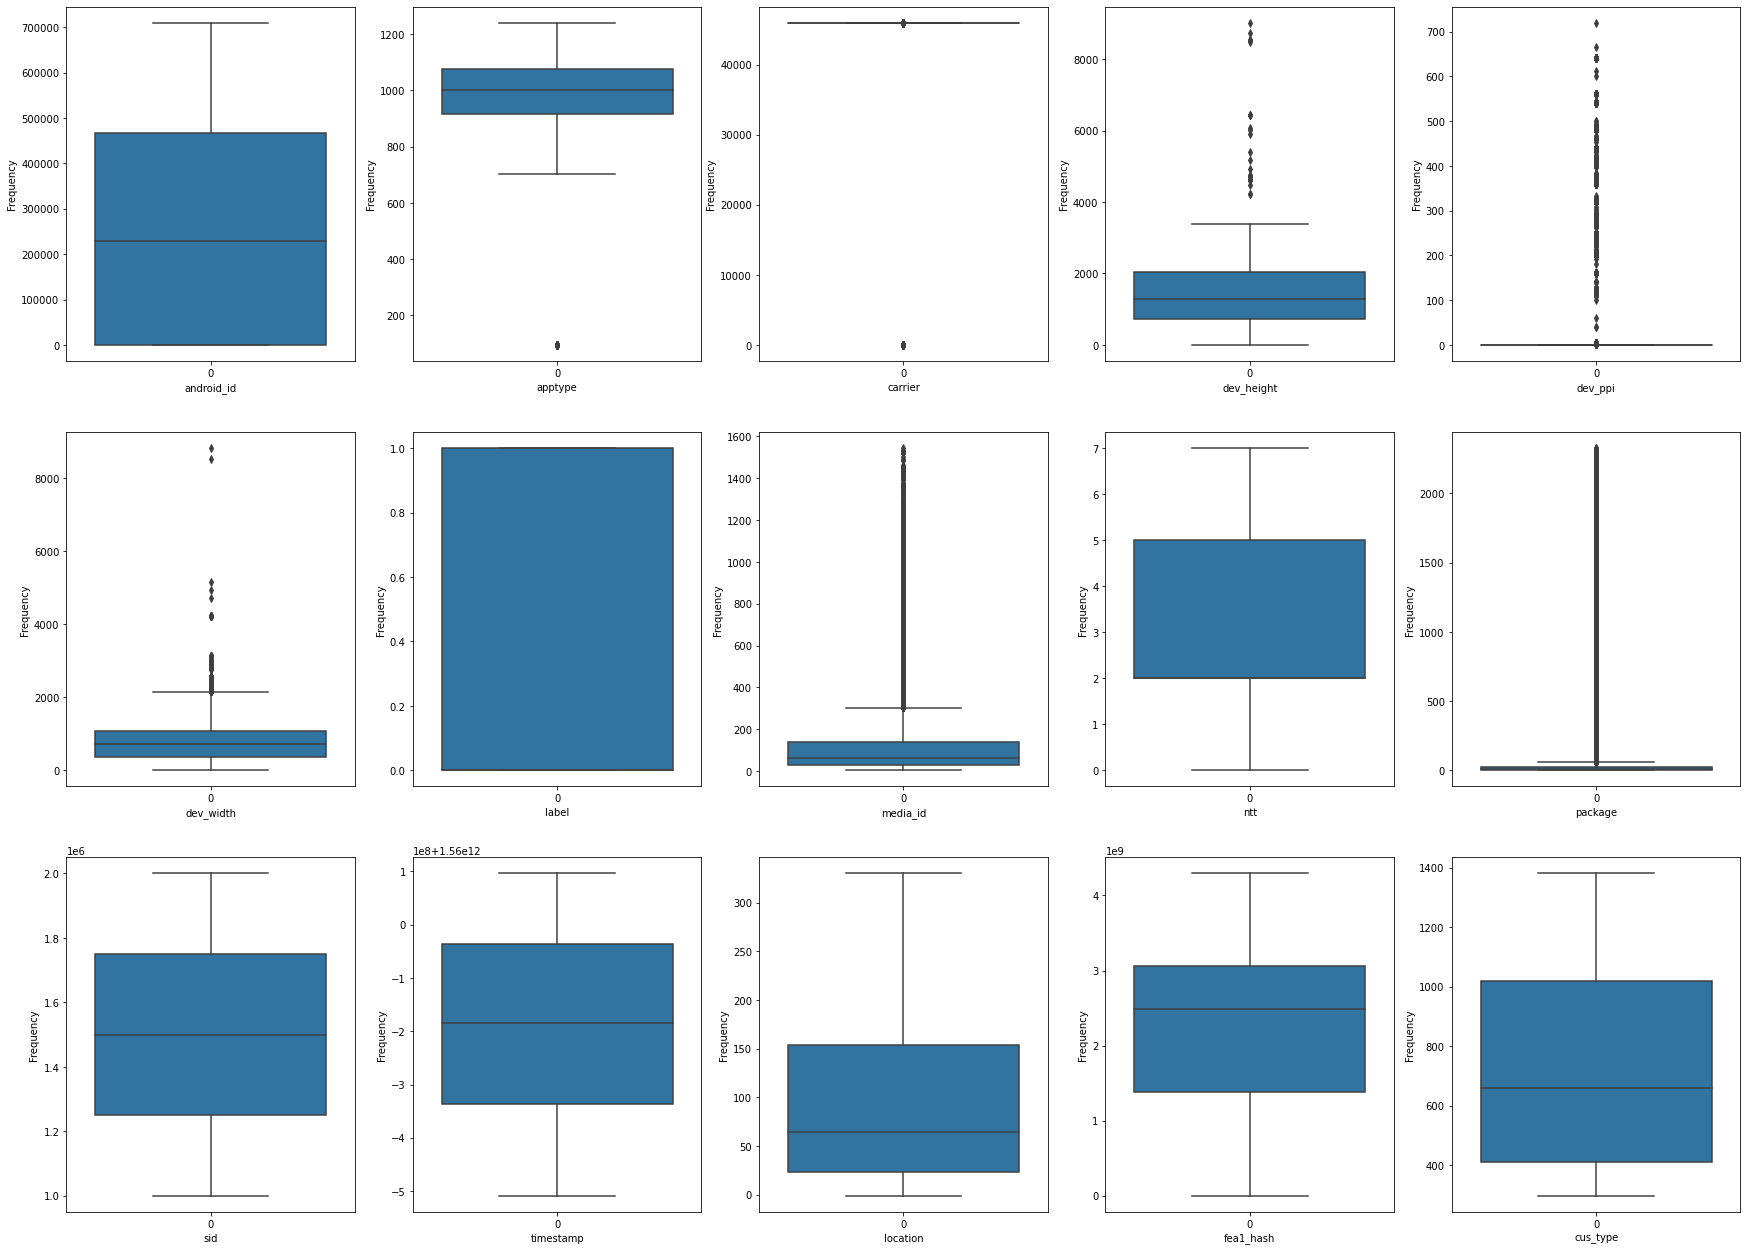

In [15]:
# 绘制箱线图，查看异常值

import matplotlib.pyplot as plt
import seaborn as sns
# 分离数值变量与分类变量
#获取数值变量
Nu_feature = list(df.select_dtypes(exclude=['object']).columns)  
#获取分类变量
Ca_feature = list(df.select_dtypes(include=['object']).columns)
# 绘制箱线图
plt.figure(figsize=(30,30))   #  箱线图查看数值型变量异常值
i=1
for col in Nu_feature:
    ax=plt.subplot(4,5,i)
    ax=sns.boxplot(data=df[col])
    ax.set_xlabel(col) # 设置x轴标签为当前变量的名称
    ax.set_ylabel('Frequency')# 设置y轴标签为"Frequency"
    i+=1
plt.show()
# 结合原始数据及经验，真正的异常值只有umbrella_limit这一个变量，有一个-1000000的异常值，但测试集没有，可以忽

In [8]:
print(df.dtypes)

Unnamed: 0      int64
android_id      int64
apptype         int64
carrier       float64
dev_height    float64
dev_ppi       float64
dev_width     float64
label           int64
lan            object
media_id        int64
ntt           float64
os             object
osv            object
package         int64
sid             int64
timestamp     float64
version        object
fea_hash       object
location        int64
fea1_hash       int64
cus_type        int64
dtype: object


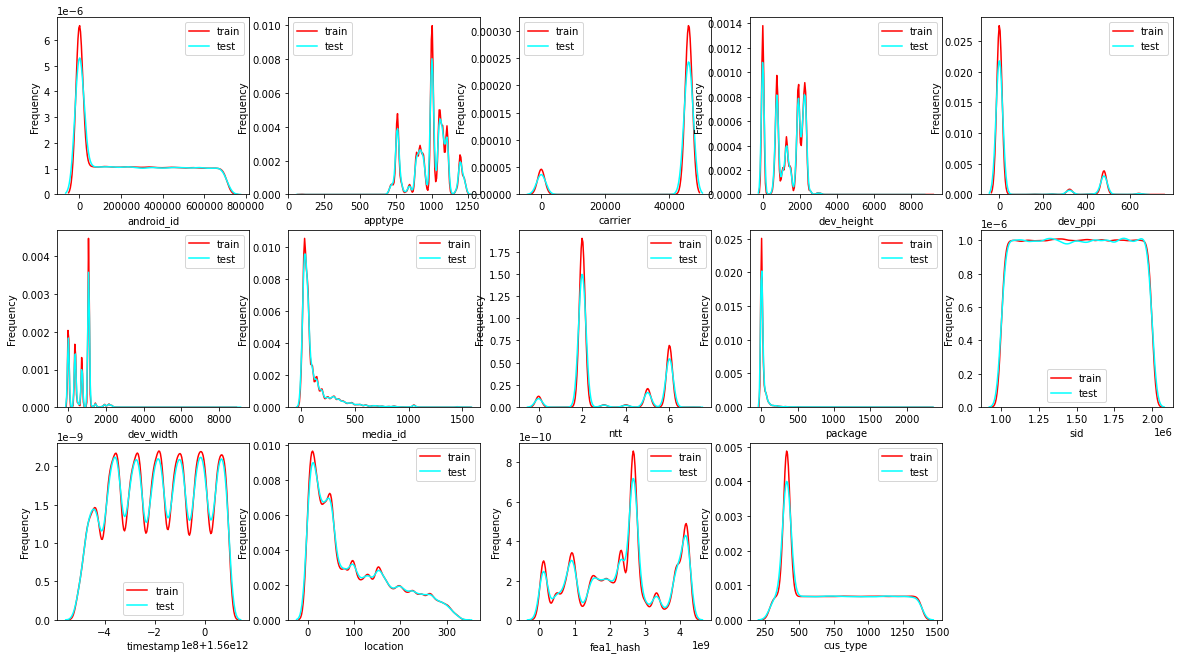

In [16]:
#查看训练集与测试集数值变量分布

import warnings

warnings.filterwarnings("ignore")
plt.figure(figsize=(20,15))
i=1

for col in Nu_feature:
    if col=="label":
        continue
    ax=plt.subplot(4,5,i)

    #绘制训练集的核密度估计图
    ax=sns.kdeplot(df[col],color='red')
    #绘制测试集的核密度估计图
    ax=sns.kdeplot(test[col],color='cyan')
    ax.set_xlabel(col)# 设置x轴标签为当前变量的名称
    ax.set_ylabel('Frequency')# 设置y轴标签为"Frequency"
    ax=ax.legend(['train','test'])# 设置图例，标明train和test
    i+=1
plt.show()

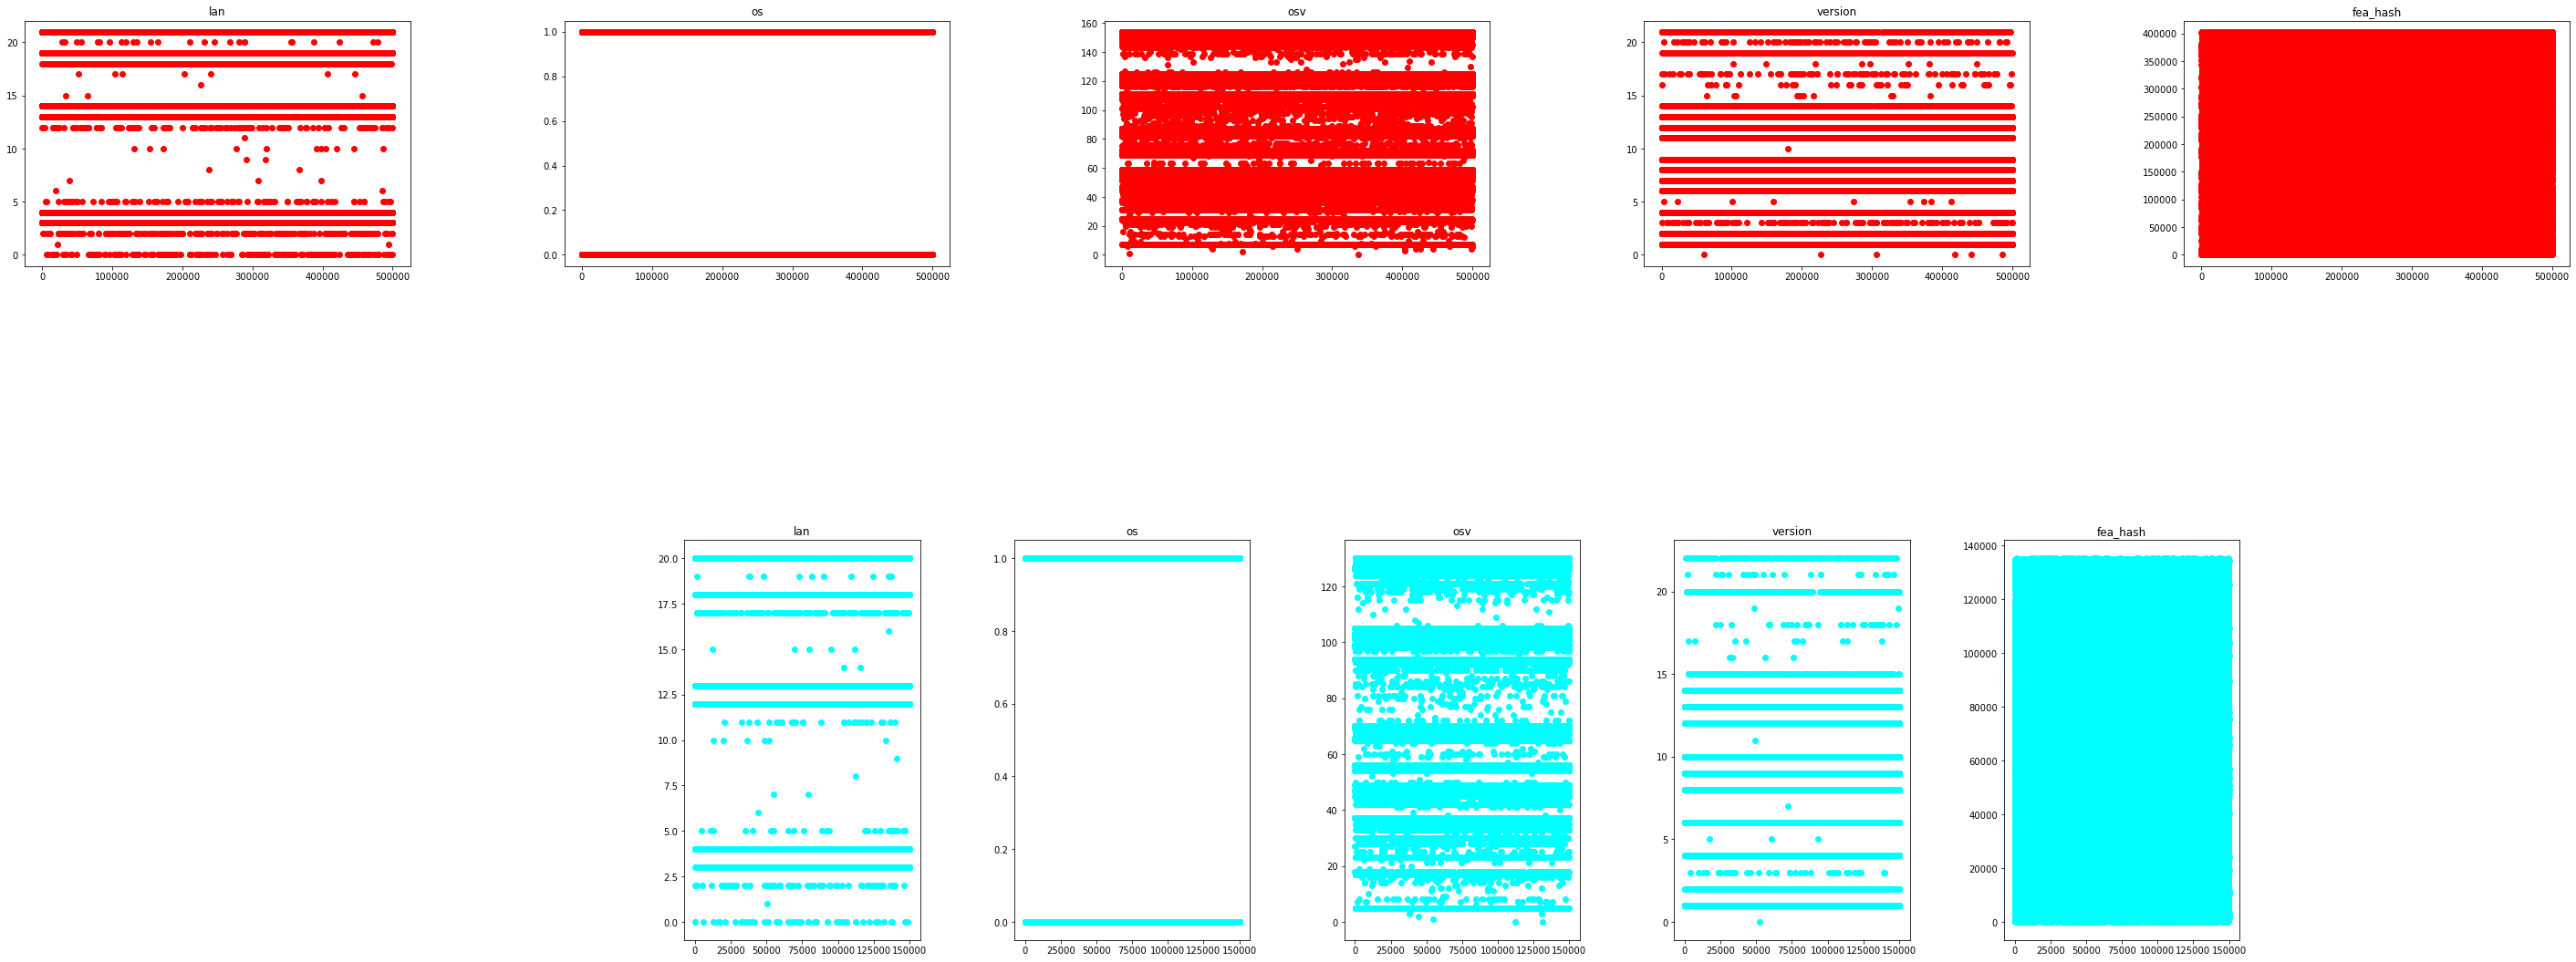

In [17]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
# 查看分类变量分布
col1=Ca_feature
plt.figure(figsize=(50,50))
j=1
for col in col1:
    df[col]=lb.fit_transform(df[col])
    ax=plt.subplot(8,5,j)
    ax=plt.scatter(x=range(len(df)),y=df[col],color='red')
    plt.title(col)
    j+=1
k=11
for col in col1:
    test[col]=lb.fit_transform(test[col])
    ax=plt.subplot(5,8,k)
    ax=plt.scatter(x=range(len(test)),y=test[col],color='cyan')
    plt.title(col)
    k+=1
plt.subplots_adjust(wspace=0.4,hspace=0.3)  
plt.show()

<AxesSubplot:>

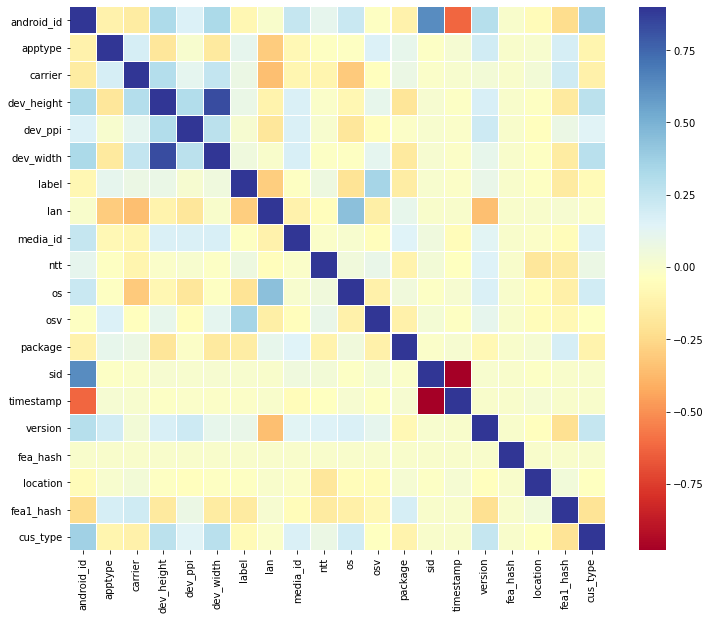

In [18]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()                               
cols = Ca_feature
for m in cols:
    df[m] = lb.fit_transform(df[m])
    test[m] = lb.fit_transform(test[m])


correlation_matrix=df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix,vmax=0.9,linewidths=0.05,cmap="RdYlBu")
# 几个相关性比较高的特征在模型的特征输出部分也占据比较重要的位置